# Lab 9: Linear Algebra Wrap Up

In this notebook, we'll look at a few remaining topics from our discussion of Linear Algebra including matrix diagonalization, Singular Value Decomposition (SVD), and Rank Reduction using SVD. 

In [1]:
#import a few packages we'll need to get started
import numpy as np
import matplotlib.pyplot as plt

### Activity 1: Matrix Diagonalization

Recall from class that matrix diagonalization is accomplished using the relation:

$$
A = P D P^{-1}
$$

where D is a diagonal matrix containing the eigenvalues of A along its diagonal and P is the matrix whose columns are the eigenvectors of A. Note for this process to work, the matrix P must be invertable, and this only is allowed for square matricies. 

In order to diagonalize a matrix, we must:
* Compute eigenvalues and eigenvectors of A
* Form diagonal matrix D from eigenvalues
* Form the matrix P from the eigenvectors
* Calculate P inverse
* Finally check that the relation $A = PDP^{-1}$ is satisfied

With the above instructions in mind, take a moment to review the code below. It goes through the process of constructing the matrix D and P for a given matrix A

In [2]:
def m_diag(A):
    n = A.shape[0]
    
    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    # Form the diagonal matrix D with eigenvalues on the diagonal
    D = np.zeros((n, n))
    for i in range(n):
        D[i, i] = eigenvalues[i]
    
    # The matrix P has eigenvectors as its columns
    P = eigenvectors.copy()
    
    # Compute det(P), if small the matrix may not be invertable
    if np.abs(np.linalg.det(P))<1E-3:
        print("Warning: Matrix P is ill conditioned. Matrix A may not be diagonalizable.")
        P_inverse = None
    
    return D, P

Define an example matrix A, then use our m_diag() function on it. Print the results. 

In [3]:
# Example Matrix A
A = np.array([[4, 2, 3],
              [1, 5, 2],
              [2, 2, 7]])


# get D and P from m_diag()
D, P = m_diag(np.float32(A)) #go ahead and say the matrix entries are float to avoid errors

#print results
print("\nDiagonal matrix D:")
print(D)

print("\nEigenvector matrix P:")
print(P)


Diagonal matrix D:
[[9.65427303 0.         0.        ]
 [0.         2.59802365 0.        ]
 [0.         0.         3.74770284]]

Eigenvector matrix P:
[[ 0.5370558   0.91836274 -0.08049159]
 [ 0.4277996  -0.05615931 -0.826213  ]
 [ 0.7270203  -0.3917347   0.55757797]]


Find and print P-inverse

In [4]:
# Calculate inverse
P_inv = np.linalg.inv(P)

# print result
print("P^-1:")
print(P_inv)

P^-1:
[[ 0.37320796  0.50521713  0.8025014 ]
 [ 0.882324   -0.37636212 -0.43031758]
 [ 0.1332677  -0.9231664   0.44477165]]


Perform reconstruction of A using relation $\mathsf{PDP^{-1}$ = A}$

In [5]:
print("Original matrix A:")
print(A)


#Calculate reconstruction - if you haven't seen this before @ is also multiplicaion symbol for matricies
A_reconstructed = P @ D @ P_inv

print("\nReconstruction A = P * D * P^(-1):")
print(A_reconstructed)


Original matrix A:
[[4 2 3]
 [1 5 2]
 [2 2 7]]

Reconstruction A = P * D * P^(-1):
[[3.99999992 1.99999996 2.99999996]
 [0.99999992 5.00000001 1.99999977]
 [1.99999986 1.9999997  6.99999975]]


This result is close enough considering that we are likely to have some roundoff error, and applying modest rounding rules would return the original matrix.

Next, let's take a closer look at this process by constructing a matrix with properties that are our own design

In [6]:
# Define eigenvalues to use
lambda1, lambda2, lambda3 = 1, 2, 3


# Define eigenvectors to use
v1 = np.array([ 3 , 3 , 3])
v2= np.array([ 4 , 4 , 4])
v3 = np.array([5 , 5 , 5])


Construct the matrix D from eigenvalues

In [7]:
D = np.diag([lambda1,lambda2,lambda3])

print("\nEigenvector matrix D:")
print(D)


Eigenvector matrix D:
[[1 0 0]
 [0 2 0]
 [0 0 3]]


Construct the matrix P from the eigenvectors

In [8]:
#construct the matrix P
P=np.column_stack((v1, v2, v3))

print("\nEigenvector matrix P:")
print(P)


Eigenvector matrix P:
[[3 4 5]
 [3 4 5]
 [3 4 5]]


For this process to work, P must be invertable. Try calculating the inverse. If this fails, then you might have to go back and adjust values in your eigenvectors.

In [12]:
# Calculate inverse (ensure float)
P_inv = np.linalg.pinv(P)

# print result
print("P^-1:")
print(P_inv)

P^-1:
[[0.02       0.02       0.02      ]
 [0.02666667 0.02666667 0.02666667]
 [0.03333333 0.03333333 0.03333333]]


Find the resulting matrix A

In [13]:
#Calculate resulting matrix A
A_new = P @ D @ P_inv

print("\n Newly Constructed A:")
print(A_new)


 Newly Constructed A:
[[0.77333333 0.77333333 0.77333333]
 [0.77333333 0.77333333 0.77333333]
 [0.77333333 0.77333333 0.77333333]]


Now verify that we get our original eigenvalues 

In [14]:
#get eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A_new)

print("Resulting Eigenvalues: ")
print(eigenvalues)

Resulting Eigenvalues: 
[0.   2.32 0.  ]


And now the resulting eigenvectors

In [15]:
v1_result = eigenvectors[:,0] 
v2_result = eigenvectors[:,1]  
v3_result = eigenvectors[:,2]  

print("\nResulting Eigenvectors: ")
print("v1:", v1_result)
print("v2:", v2_result)
print("v3:", v3_result)


Resulting Eigenvectors: 
v1: [-0.81649658  0.40824829  0.40824829]
v2: [0.57735027 0.57735027 0.57735027]
v3: [ 0.         -0.70710678  0.70710678]


(optional) If you are not convinced v1, v2, v3 returned as exected, take a moment to work out the nomalization to verify the result

In [16]:
#get normalization
vectornorm = np.linalg.norm(v2)

# re-scale the vector
scaled_vector = vectornorm*v1_result #note: you might have to switch which vector is referenced because they may not come back in the same order!

#print result
print(scaled_vector)

[-5.65685425  2.82842712  2.82842712]


### Activity 2: Singular Value Decomposition

Recall from class that Singular Value Decomposition (SVD) is another type of matrix factorization technique that expresses a matrix as te producet of 3 matricies in the form:
$$
A = U \Sigma V^T
$$

Notably this is different from the last procedure because we are not using eigenvalues and eigenvectors of A, and also this techinque works on non-square matricies!

We'll reuse our earlier matrix A to start this activity.

In [17]:
print("Matrix A:")
print(A)

Matrix A:
[[4 2 3]
 [1 5 2]
 [2 2 7]]


Perform SVD and print the results

In [18]:
# get SVD
U, sigma, VT = np.linalg.svd(A)

# note sigma are just the singular values, so we have to 'rebuild' it to the Sigma Matrix
Sigma = np.zeros(A.shape)
Sigma[:len(sigma), :len(sigma)] = np.diag(sigma)

print(f" Matrix U:")
print(U)
print(f"\nMatrix Sigma:")
print(Sigma)
print(f"\nMatrix V^T:")
print(VT)


 Matrix U:
[[-0.50321328  0.0039158  -0.86415338]
 [-0.44847219 -0.85596851  0.25727534]
 [-0.73868064  0.51701312  0.43249085]]

Matrix Sigma:
[[9.76042765 0.         0.        ]
 [0.         3.76885376 0.        ]
 [0.         0.         2.55534605]]

Matrix V^T:
[[-0.40353627 -0.48421534 -0.77633368]
 [ 0.05140049 -0.8591431   0.50914744]
 [-0.91351873  0.16555553  0.37158431]]


Verify that we can use these results to reconstruct A

In [19]:
#Calculate reconstruction
A_reconstructed = U @ Sigma @ VT

print("\nReconstruction A = U * \Sigma * V^T:")
print(A_reconstructed)


Reconstruction A = U * \Sigma * V^T:
[[4. 2. 3.]
 [1. 5. 2.]
 [2. 2. 7.]]


### Activity 3: SVD and Reducing Rank

In this activity, we will take a look at how SVD allows for dimensionality reduction as discussed in class. Specifically we will look at application to file compression 

In [20]:
# import libraries needed
from skimage import data, color

We need to load in data for this activity. We will use an image of astronaut Eileen Collins that is included in the skimage package. Create a plot of the image to see what we are working with

Shape of image data:
(512, 512)


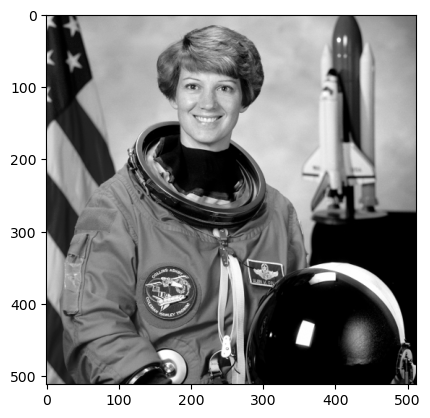

In [21]:
# Load a sample grayscale image
image = color.rgb2gray(data.astronaut())

# Print the shape of data
print('Shape of image data:')
print(np.shape(image))

# take a quick look at the image
plt.figure()
plt.imshow(image,cmap='gray')
plt.show()


While this is an image, remember that it is representable as a matrix. Run the cell below to print the first 10x10 entries, but remember the 'full' image is represented by a 512x512 matrix.

In [22]:
#set how much of image matrix to show
n = 10

# print slice of image
print('Slice of small part of image matrix: ')
print(image[:n,:n])



Slice of small part of image matrix: 
[[0.5834349  0.41485922 0.24405843 0.21578902 0.30652157 0.39328784
  0.47729255 0.53217961 0.55792627 0.53019255]
 [0.67558824 0.55600667 0.44905294 0.4224502  0.50280902 0.56634275
  0.62292627 0.64952902 0.65764    0.59460431]
 [0.7663349  0.70052431 0.64927608 0.61735294 0.64759451 0.70946863
  0.72796039 0.73101882 0.69291922 0.61000784]
 [0.84027922 0.8145098  0.77923843 0.7545851  0.7663498  0.77725922
  0.79182941 0.76157294 0.68620706 0.5615651 ]
 [0.8820098  0.86633137 0.84672353 0.8265651  0.8363498  0.81114667
  0.81142941 0.7374702  0.63550941 0.48930235]
 [0.90302431 0.89882    0.88118431 0.86156863 0.85372549 0.82768118
  0.77669373 0.68844706 0.56660275 0.40360824]
 [0.90190824 0.90722863 0.89154235 0.88063373 0.84644078 0.80834118
  0.72514    0.63018118 0.48145922 0.29831333]
 [0.88957804 0.89377451 0.88089373 0.86184431 0.83272667 0.78929882
  0.71731176 0.58706667 0.40671137 0.20874941]
 [0.87809608 0.87976275 0.86967961 0.85064

Peform SVD on the image

In [23]:
# Perform SVD
U, S, VT = np.linalg.svd(image)

Let's now look at reducing the deminsionality of data kept for reconstructing the image. Use the parameter K below to only keep the top 51 singular values (essentially 10%) of the original matrix data. 

In [26]:
# Keep only the top 'k' singular values
k = 51

# use the specified k above to slice the SVD matricies appropriately
Sigma_k = np.diag(S[:k])
U_k = U[:, :k]
VT_k = VT[:k, :]

Perform the image reconstruction

In [27]:
# Reconstruct the image using only the top k components
compressed_image = U_k @ Sigma_k @ VT_k

Plot the reconstructed image side by side with the original. How well has this process worked, even with keeping an small amount of the original data?

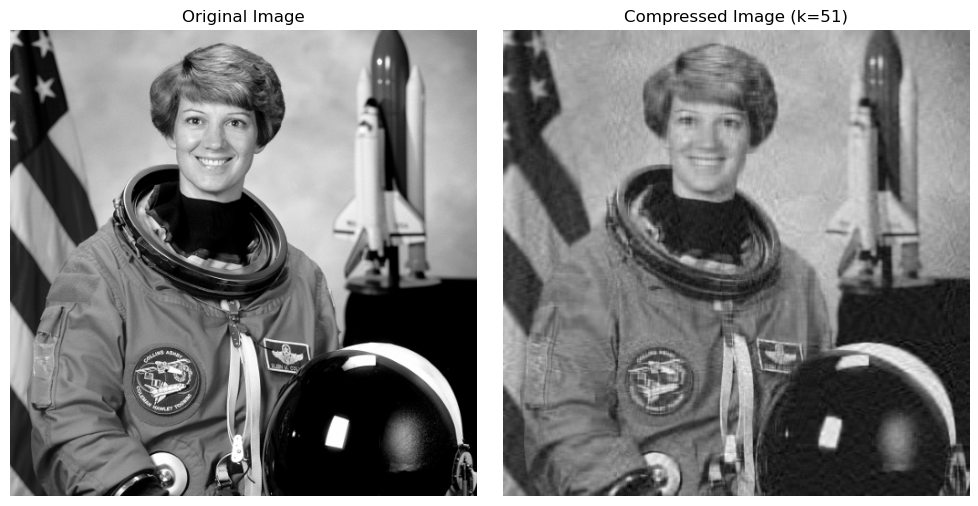

This uses only 9.96% of the singular values of the original image matrix!


In [28]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(compressed_image, cmap='gray')
plt.title(f'Compressed Image (k={k})')
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"This uses only {k/len(S)*100:.2f}% of the singular values of the original image matrix!")

Try this out again using different amounts of data retained in the reconstruction by adjusting the value of 'k'. Try to answer the following questions
 - What is the minimum value needed to at least retain some of the original image that is recognisable? 
 - Can you 'by eye' tell any difference when 80, 85, 90, 95, ...% of the data is kept? 